In [1]:
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error

import xgboost as xgb

import matplotlib.pyplot as plt

Data cleaning and preparation

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
for col in df.dtypes[df.dtypes == 'object'].index:
    df[col] = df[col].str.lower().str.replace(' ', '_')


In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [6]:
# Fill missing values with zeros.
df = df.fillna(0)

In [7]:
df.isna().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [8]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [9]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,usa,gasoline,front-wheel_drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,asia,diesel,front-wheel_drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,usa,gasoline,all-wheel_drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,usa,diesel,all-wheel_drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,usa,diesel,front-wheel_drive,-1.0


In [10]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

Question 1

In [11]:
# Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.
#     Train a model with max_depth=1.

# Which feature is used for splitting the data?

#     'vehicle_weight'
#     'model_year'
#     'origin'
#     'fuel_type'

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



Question 2

In [12]:
# Train a random forest regressor with these parameters:

#     n_estimators=10
#     random_state=1
#     n_jobs=-1 (optional - to make training faster)

# What's the RMSE of this model on the validation data?

#     0.045
#     0.45
#     4.5
#     45.0

rf = RandomForestRegressor(
    n_estimators=10, 
    random_state= 1, 
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred)

0.4599777557336148

Question 3

In [13]:
# Now let's experiment with the n_estimators parameter

#     Try different values of this parameter from 10 to 200 with step 10.
#     Set random_state to 1.
#     Evaluate the model on the validation dataset.

# After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

#     10
#     25
#     80
#     200

# If it doesn't stop improving, use the latest iteration number in your answer.
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append(rmse)


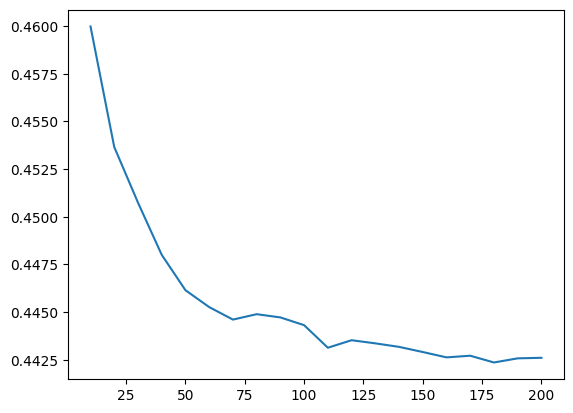

In [14]:
plt.plot(range(10, 201, 10), scores)

Question 4

In [15]:
# Let's select the best max_depth:

#     Try different values of max_depth: [10, 15, 20, 25]
#     For each of these values,
#         try different values of n_estimators from 10 till 200 (with step 10)
#         calculate the mean RMSE
#     Fix the random seed: random_state=1

# What's the best max_depth, using the mean RMSE?

#     10
#     15
#     20
#     25

scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(
            n_estimators=n, 
            max_depth=d, 
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores.append((d, n, rmse))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,0.451895
1,10,20,0.448719
2,10,30,0.446225
3,10,40,0.443877
4,10,50,0.442682


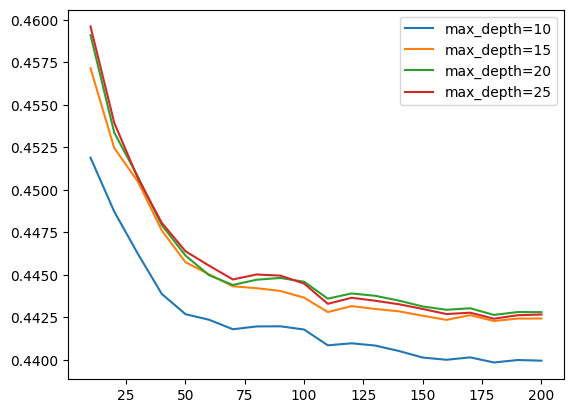

In [16]:
scores = []

for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores['max_depth'] == d]
    plt.plot(df_subset['n_estimators'], df_subset['rmse'], 
             label='max_depth=%d' % d)

plt.legend()

Question 5

In [17]:
# We can extract feature importance information from tree-based models.

# At each step of the decision tree learning algorithm, it finds the best split. 
# When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
# This gain is quite useful in understanding what are the important features for tree-based models.

# In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

# For this homework question, we'll find the most important feature:

#     Train the model with these parameters:
#         n_estimators=10,
#         max_depth=20,
#         random_state=1,
#         n_jobs=-1 (optional)
#     Get the feature importance information from this model

# What's the most important feature (among these 4)?

#     vehicle_weight
#     horsepower
#     acceleration
#     engine_displacement

rf = RandomForestRegressor(
    n_estimators=10, 
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
features = dv.get_feature_names_out()
pd.DataFrame({'feature': features, 'importance': feature_importances}).sort_values(by='importance', ascending=False)


,feature,importance
13,vehicle_weight,0.959162
6,horsepower,0.016040
0,acceleration,0.011471
3,engine_displacement,0.003269
7,model_year,0.003182
8,num_cylinders,0.002359
9,num_doors,0.001591
12,origin=usa,0.000555
11,origin=europe,0.000520
10,origin=asia,0.000476


Question 6

In [18]:
# Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

#     Install XGBoost
#     Create DMatrix for train and validation
#     Create a watchlist
#     Train a model with these parameters for 100 rounds:

# xgb_params = {
#     'eta': 0.3, 
#     'max_depth': 6,
#     'min_child_weight': 1,
    
#     'objective': 'reg:squarederror',
#     'nthread': 8,
    
#     'seed': 1,
#     'verbosity': 1,
# }

# Now change eta from 0.3 to 0.1.

# Which eta leads to the best RMSE score on the validation dataset?

#     0.3
#     0.1
#     Both give equal value

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features.tolist())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features.tolist())

watchlist = [(dtrain, 'train'), (dval, 'val')]


In [19]:
def parse_xgb_output(output):
    it_lines = [x.split('\t') for x in output.stdout.strip('\n').split('\n')]
    it = [int(x[0].strip('[]')) for x in it_lines]
    train = [float(x[1].split(':')[1]) for x in it_lines]
    val = [float(x[2].split(':')[1]) for x in it_lines]

    df_results = pd.DataFrame({
        'num_iter': it, 
        'train_rmse': train, 
        'val_rmse': val
    })

    return df_results

In [20]:
scores = {}

In [21]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6, 
    'min_child_weight': 1, 

    'objective': 'reg:squarederror',
    'nthread': 8, 

    'seed': 1, 
    'verbosity': 1
}

In [22]:
%%capture output

model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=100, 
    evals=watchlist
)

In [23]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [24]:
scores.keys()

dict_keys(['eta=0.3'])

In [25]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6, 
    'min_child_weight': 1, 

    'objective': 'reg:squarederror',
    'nthread': 8, 

    'seed': 1, 
    'verbosity': 1
}

In [26]:
%%capture output

model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=100, 
    evals=watchlist
)

In [27]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [28]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

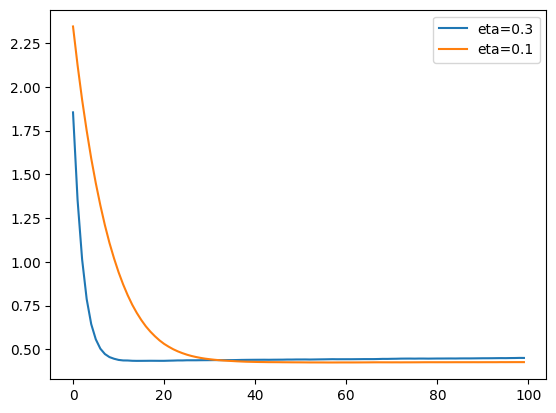

In [29]:
for key, df_score in scores.items():
    plt.plot(df_score['num_iter'], df_score['val_rmse'], label=key)
plt.legend()

In [30]:
# max_depth = 6 / min_child_weight=1
for eta in [0.1, 0.3]:
    print(eta)
    print(scores[f'eta={eta}'][scores[f'eta={eta}']['val_rmse'] == scores[f'eta={eta}']['val_rmse'].min()])
    print('----------------------------------')

0.1
    num_iter  train_rmse  val_rmse
56        56     0.33386   0.42426
----------------------------------
0.3
    num_iter  train_rmse  val_rmse
14        14     0.35025   0.43349
----------------------------------
